In [1]:
import numpy as np

In [2]:
def parabola(x, a, b, c):
    return a*x**2 + b*x + c

def gamma(beta):
    return 1/(np.sqrt(1-beta**2))

def beta(gamma):
    return np.sqrt(1-(1/gamma**2))

def gammaE(energy):
    return energy/(0.511*1E6)

def calc_emit(a, b, c, d, el, prefac = 1):
    s11 = a/((d*el)**2)
    s12 = (b-2*d*el*s11)/(2*el*d**2)
    s22 = (c - s11 - 2*d*s12)/d**2
    geometric_emittance = np.sqrt(s11*s22-((s12)**2))
    return geometric_emittance*prefac

def calcEmit(A, B, C, prefac = 1):
    sig_11 = A/(s12)**2
    sig_12 = (-A/(s12)**2)*(B + (s11/s12))
    sig_22 = (1/s12**2)*(A*B*B + C) + 2*A*B*(s11/s12) + A*(s11/s12)**2
    ge = np.sqrt(A*C)/(sig_12)**2
    ne = prefac*ge
    return ne
beam_energy = 750 * 1E3
beta = beta(gammaE(beam_energy))
prefac = beta*gamma(beta)



### This is the distance from the solenoid to the YAG
L = (1.490314 - 0.24653) #(1.490314-0.246530) ### THIS IS IN METERSSSS ### sept 18, Nicole will send info

### This is the effective length/width of the solenoid
el = 0.1342 

## This is used in the second emit Calc method
M_drift = np.identity(2)
M_drift[0, 1] = L

s11 = M_drift[0,0]
s12 = M_drift[0,1]
s21 = M_drift[1,0]
s22 = M_drift[1,1]

In [3]:
import matplotlib.pyplot as plt
import os
import sys
import glob
# sys.path.append('/global/u1/l/lgupta/cori/GitHub/lcls-tools/')
# sys.path.append('/global/u1/l/lgupta/cori/GitHub/lcls-tools/lcls_tools/devices/profile_monitor')
# sys.path.append('/global/u1/l/lgupta/cori/GitHub/lcls-tools/lcls_tools/devices/magnet')
# sys.path.append('/global/u1/l/lgupta/cori/GitHub/lcls-tools/lcls_tools/image_processing')
# sys.path.append('/global/u1/l/lgupta/cori/GitHub/lcls-tools/lcls_tools/cor_plot')
sys.path.append('/gpfs/slac/staas/fs1/g/accelerator_modeling/lgupta/github/lcls-tools/')
sys.path.append('/gpfs/slac/staas/fs1/g/accelerator_modeling/lgupta/github/lcls-tools/lcls_tools/devices/profile_monitor')
sys.path.append('/gpfs/slac/staas/fs1/g/accelerator_modeling/lgupta/github/lcls-tools/lcls_tools/devices/magnet')
sys.path.append('/gpfs/slac/staas/fs1/g/accelerator_modeling/lgupta/github/lcls-tools/lcls_tools/image_processing')
sys.path.append('/gpfs/slac/staas/fs1/g/accelerator_modeling/lgupta/github//lcls-tools/lcls_tools/cor_plot')
from lcls_tools import image_processing as imp
from cor_plot_mat_scan import CorPlotMatScan as C
import scipy.optimize

#PATH = "/global/u1/l/lgupta/m669/MeasuredData/Emittance/"
PATH = "/sdf/home/l/lgupta/lgupta/datasets/emittance/"
FILES = glob.glob(PATH+"Corr*")
FILES.sort()
print(len(FILES))


40


In [22]:
def getCorrInfo(file):
    data = C(file)
    s = data.samples
    print(s)
    # can use to see the number of data points
    #print(data.beam.keys())

    # set the x values for plot
    x = data.ctrl_vals

    # format: data.beam[iteration][sample][fit][beam_name]
    # iteration: length of x
    # sample: number of samples
    # fit: index 0-6 (see types of fit below)
    # beam_name": string chosen from types of beam_names below
    # types of fit: ['Gaussian', 'Asymmetric', 'Super', 'RMS', 'RMS cut peak', 'RMS cut area', 'RMS floor']
    # types of beam_name: profx, xStat, profy, yStat, profu, uStat, stats

    yarray = []
    yerr = []

    for i in range(0, len(x)):

        yvals = []

        for j in range(0, s):
            # store data in array
            yvals.append(((data.beam[i][j][0]['xStat'])[0])[2])

        # calculate average of data and store in array
        meany = np.mean(np.array(yvals)**2)
        #### Am squaring the beam size value
        yarray.append(meany)

        # calculate error of data and store in array
        stdy = np.std(yvals)
        yerr.append(stdy)
    
    
    ### Going to put everything in SI, micron = 1E6m so micron^2 is 1E12m. 
    yarray = np.array(yarray)*1E-12
    
    #Should make it G-m from kG-m
    x = np.array(x)*1E-3
    fit_params, pcov = scipy.optimize.curve_fit(parabola, x, yarray)
    
    
    # Correlation plot
    plt.xlabel('Magnet Strength (G-m)', fontsize=20)
    plt.ylabel('X rms (beam size) squared (m)', fontsize=20)
    plt.plot(x, yarray)
    plt.title('Correlation Plot', fontsize=30)
    plt.show()
    return x, yarray, yerr, fit_params

None
None
None
None
None
None
None
None
None
None
7


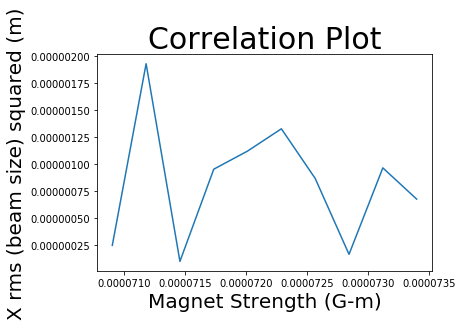

None
None
None
None
None
2


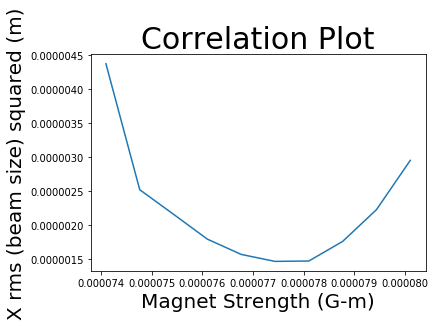

2


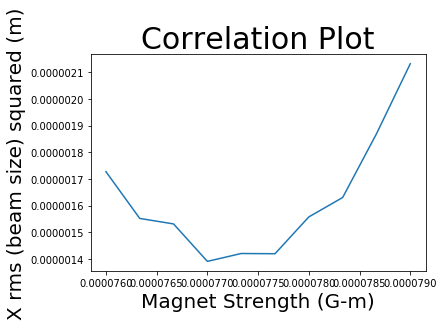

2


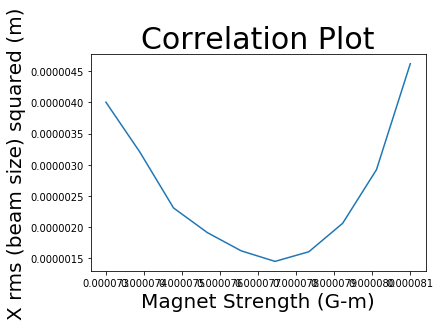

2


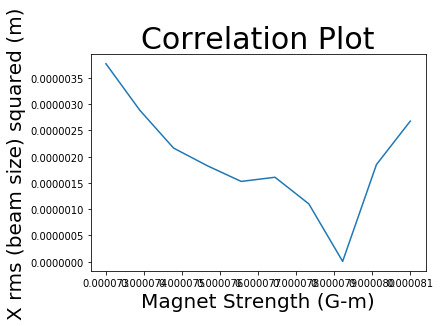

2


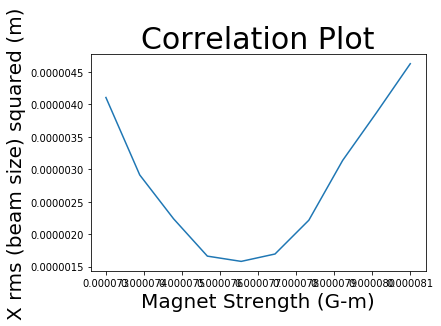

2


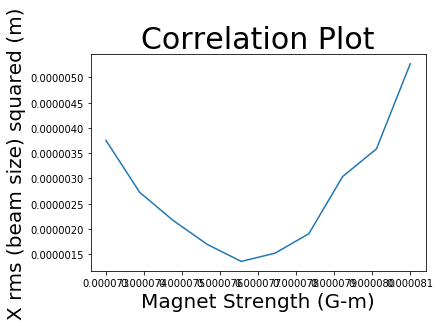

2


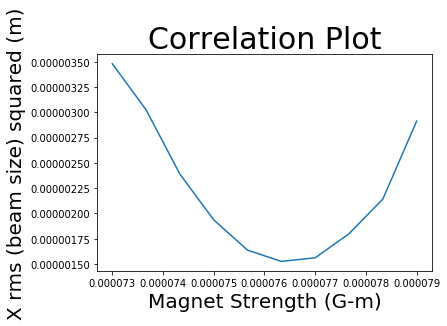

2


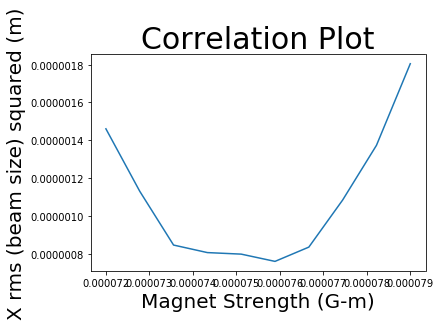

2


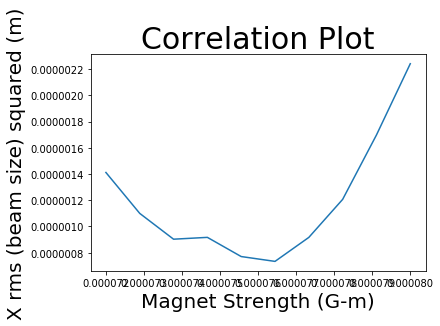

2


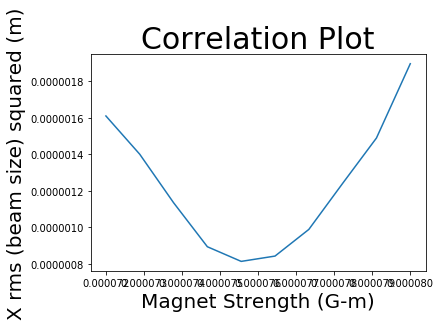

2


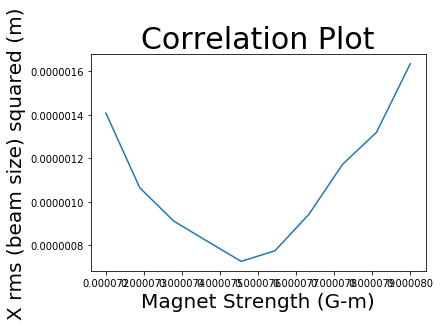

2


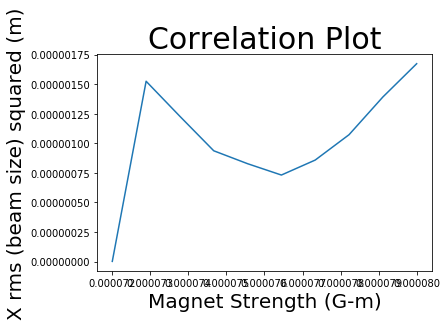

2


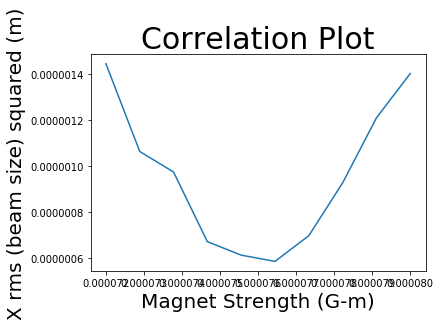

2


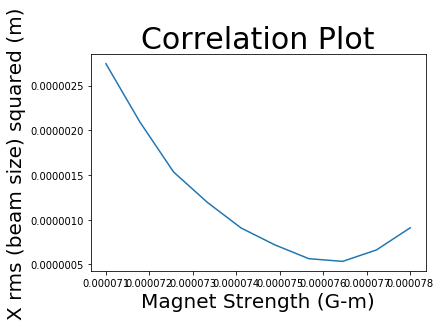

2


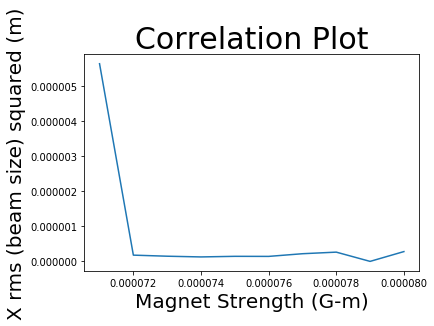

2


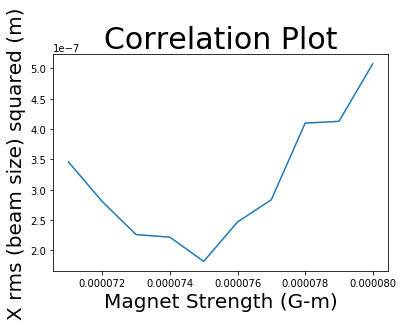

2


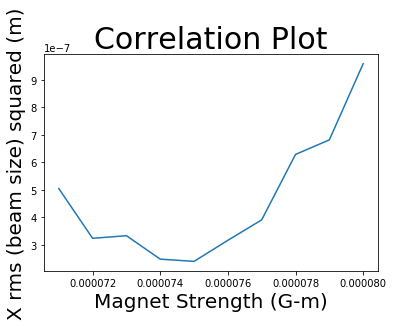

2


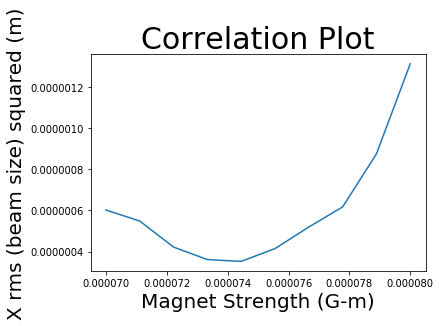

2


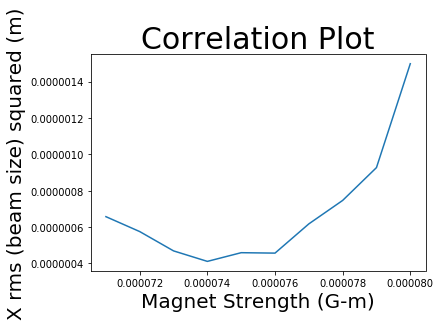

2


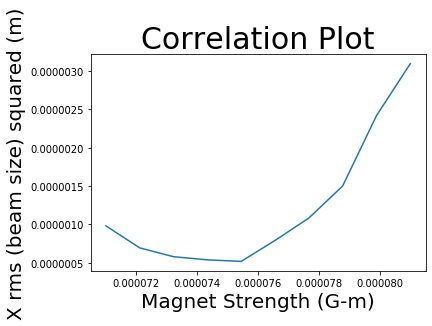

2


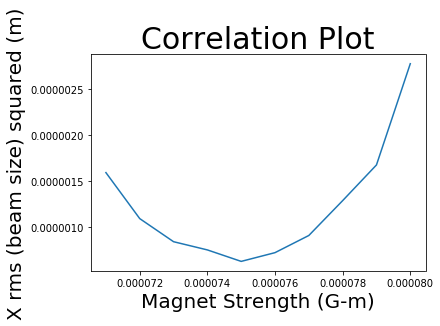

2


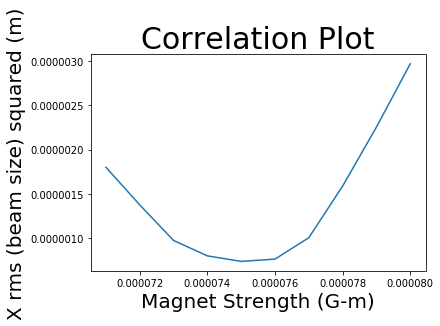

2


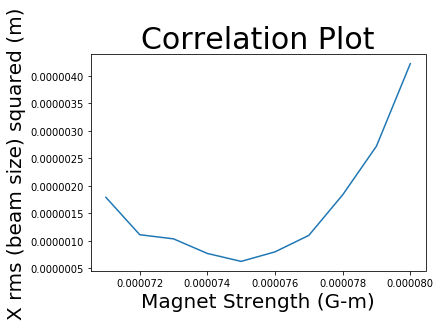

2


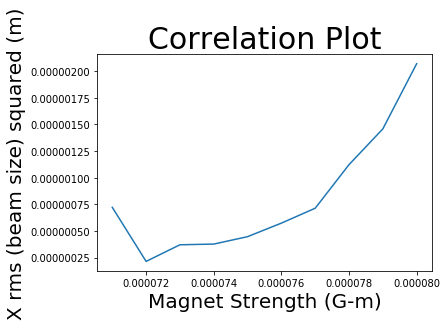

In [23]:
good = []
bad = []
for i in range(40):
    try:
        x, yarray, yerr, fit_params = getCorrInfo(FILES[i])
        good.append(FILES[i])
    except:
        bad.append(FILES[i])

7


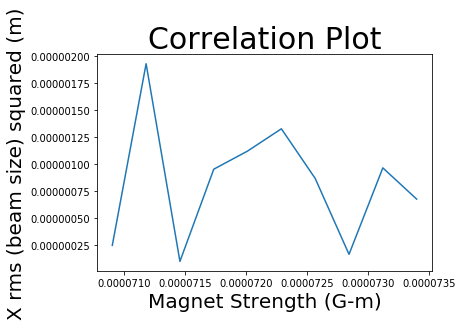

Version from Minty, Zimmermann
geometric emittance:  9.066194533082746e-13
normalized emittance:  9.740037458271016e-13
Version from CERN slides
geometric emittance:  nan
normalized emittance:  nan
2


/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt


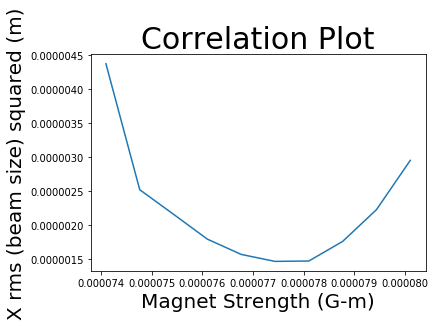

Version from Minty, Zimmermann
geometric emittance:  6.18431360021446e-13
normalized emittance:  6.643961355559185e-13
Version from CERN slides
geometric emittance:  2.704163456597992
normalized emittance:  2.9051498138984044
2


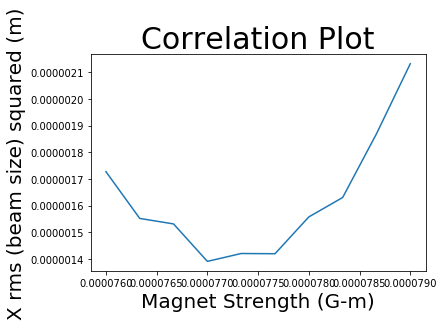

Version from Minty, Zimmermann
geometric emittance:  7.02499774349995e-13
normalized emittance:  7.547129163871248e-13
Version from CERN slides
geometric emittance:  2.70993542358485
normalized emittance:  2.9113507810687813
2


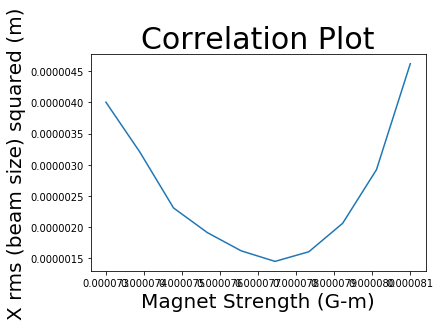

Version from Minty, Zimmermann
geometric emittance:  1.487057305828751e-12
normalized emittance:  1.5975825147491812e-12
Version from CERN slides
geometric emittance:  2.4092919084245477
normalized emittance:  2.58836200241835
2


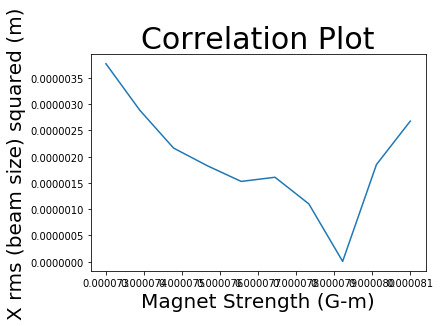

Version from Minty, Zimmermann
geometric emittance:  5.096387489555611e-12
normalized emittance:  5.4751753747398205e-12
Version from CERN slides
geometric emittance:  1.7230060940112777
normalized emittance:  1.851068144992991
2


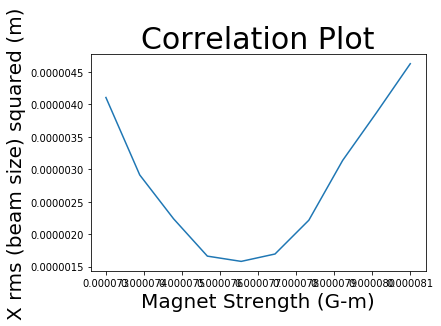

Version from Minty, Zimmermann
geometric emittance:  1.6347485410604645e-12
normalized emittance:  1.7562508687279117e-12
Version from CERN slides
geometric emittance:  2.5746662405057474
normalized emittance:  2.766027745551234
2


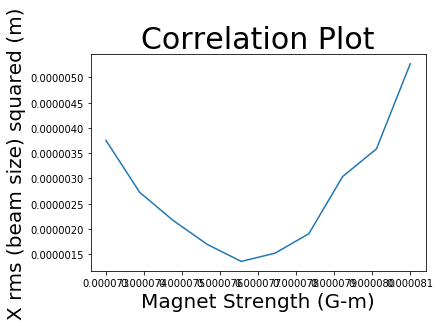

Version from Minty, Zimmermann
geometric emittance:  1.2407966177716018e-12
normalized emittance:  1.3330185549285835e-12
Version from CERN slides
geometric emittance:  2.504683113689235
normalized emittance:  2.6908431381448463
2


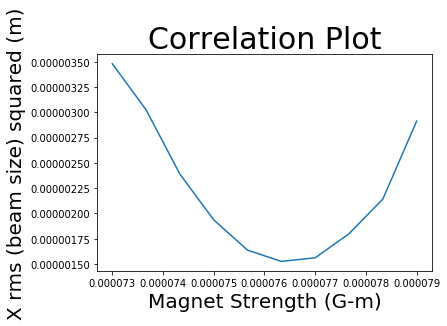

Version from Minty, Zimmermann
geometric emittance:  1.3761106761475415e-12
normalized emittance:  1.4783898010895877e-12
Version from CERN slides
geometric emittance:  2.5541020927128186
normalized emittance:  2.743935171972577
2


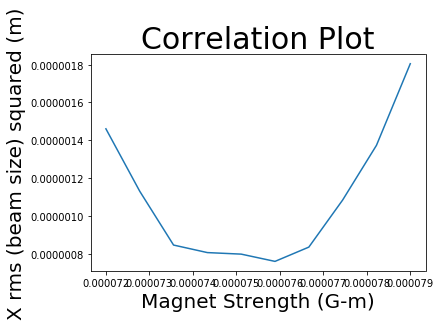

Version from Minty, Zimmermann
geometric emittance:  2.4748060942961693e-11
normalized emittance:  2.658745515821823e-11
Version from CERN slides
geometric emittance:  1.0995382553599489
normalized emittance:  1.181261195634894
2


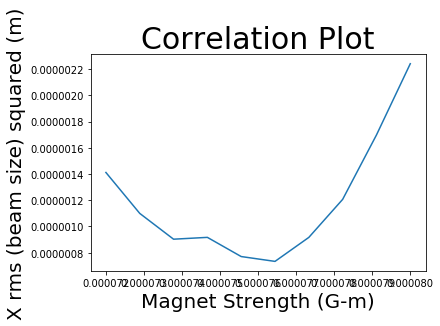

Version from Minty, Zimmermann
geometric emittance:  3.1864097401018706e-11
normalized emittance:  3.423238946918874e-11
Version from CERN slides
geometric emittance:  1.058586542872145
normalized emittance:  1.1372657560757642
2


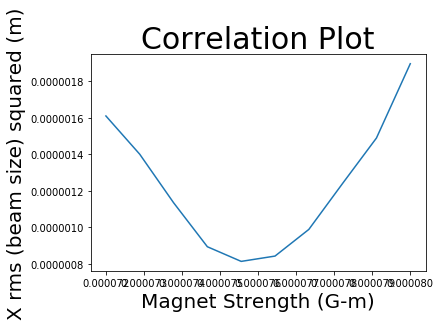

Version from Minty, Zimmermann
geometric emittance:  4.7954013528831703e-11
normalized emittance:  5.151818509308319e-11
Version from CERN slides
geometric emittance:  1.0709680930121122
normalized emittance:  1.1505675622210747
2


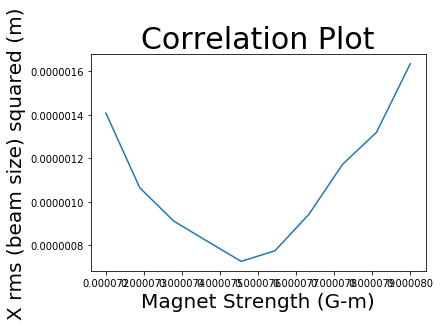

Version from Minty, Zimmermann
geometric emittance:  1.024824498163501e-10
normalized emittance:  1.1009943547805397e-10
Version from CERN slides
geometric emittance:  0.9075959832161004
normalized emittance:  0.9750528561066832
2


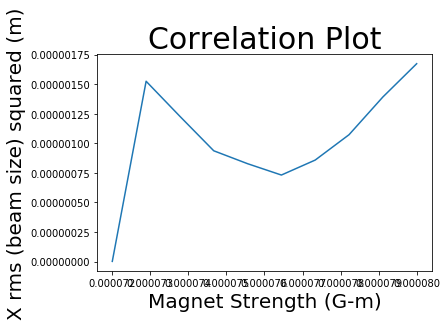

Version from Minty, Zimmermann
geometric emittance:  6.461475655716324e-08
normalized emittance:  6.94172342019929e-08
Version from CERN slides
geometric emittance:  0.40493326273057023
normalized emittance:  0.4350298388925663
2


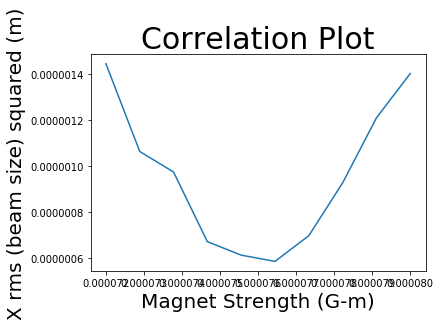

Version from Minty, Zimmermann
geometric emittance:  6.988206177431893e-11
normalized emittance:  7.507603072704365e-11
Version from CERN slides
geometric emittance:  0.8654614015078893
normalized emittance:  0.9297866308311252
2


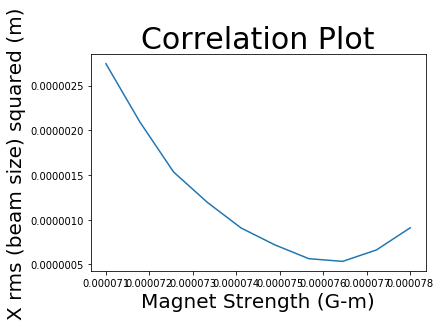

Version from Minty, Zimmermann
geometric emittance:  1.444968788492966e-11
normalized emittance:  1.5523657775704516e-11
Version from CERN slides
geometric emittance:  1.0504835196232256
normalized emittance:  1.1285604773966313
2


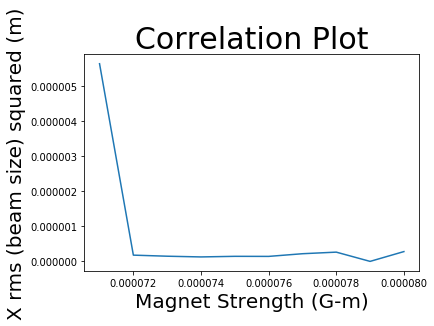

Version from Minty, Zimmermann
geometric emittance:  4.249758162482462e-12
normalized emittance:  4.565620508155755e-12
Version from CERN slides
geometric emittance:  nan
normalized emittance:  nan
2


/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt


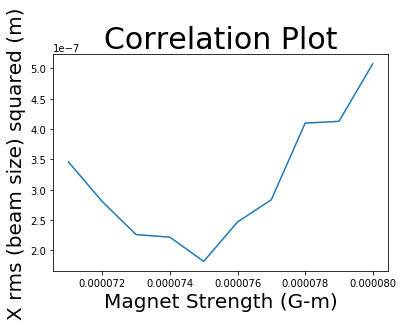

Version from Minty, Zimmermann
geometric emittance:  3.788589395049155e-08
normalized emittance:  4.070175472976508e-08
Version from CERN slides
geometric emittance:  0.2246348490989043
normalized emittance:  0.2413307851130372
2


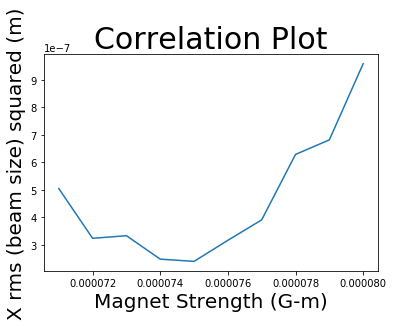

Version from Minty, Zimmermann
geometric emittance:  1.4531451533986351e-09
normalized emittance:  1.5611498490089269e-09
Version from CERN slides
geometric emittance:  0.35596205468420367
normalized emittance:  0.38241885652197216
2


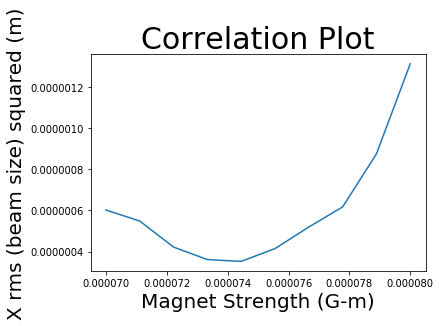

Version from Minty, Zimmermann
geometric emittance:  1.0938003578899192e-09
normalized emittance:  1.1750968301907294e-09
Version from CERN slides
geometric emittance:  0.4236075534914362
normalized emittance:  0.45509209222871133
2


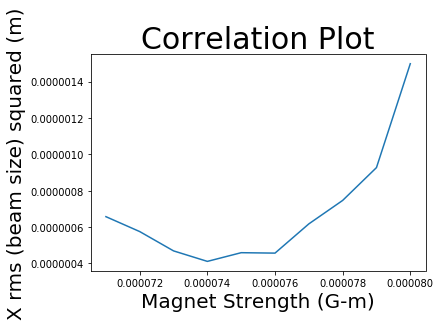

Version from Minty, Zimmermann
geometric emittance:  4.3462266652008115e-10
normalized emittance:  4.669259011233468e-10
Version from CERN slides
geometric emittance:  0.5216269994569874
normalized emittance:  0.5603968120711624
2


In [ ]:
for file in good:
    
    x, yarray, yerr, fit_params = getCorrInfo(file)
    a, b, c = fit_params

    print("Version from Minty, Zimmermann")
    print("geometric emittance:  " + str(calcEmit(a, b, c, prefac = 1)))
    print("normalized emittance:  " + str(calcEmit(a, b, c, prefac = prefac)))

    print("Version from CERN slides")
    print("geometric emittance:  " + str(calc_emit(a, b, c, L, el, prefac = 1)))
    print("normalized emittance:  " + str(calc_emit(a, b, c, L, el, prefac = prefac)))